In [2]:
from keras.models import Sequential

In [3]:
from keras.layers import Dense, LSTM

In [4]:
import math

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import pandas_datareader as web

In [8]:
import matplotlib.pyplot as plt

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
#These are the main libraries used in neural network models like the LSTM
# This following code uses an artificial neural network called Long Short-Term Memory (LSTM) to predict the closing price
# of a corporation (in this case AAPL) using the past 60 day stock price

In [16]:
plt.style.use('fivethirtyeight')

In [18]:
import yfinance as yf

In [21]:
df = yf.Ticker("AAPL")

In [22]:
df = df.history(start="2012-01-01", end="2019-12-17")

In [23]:
#Show data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,12.394289,12.488139,12.382179,12.449690,302220800,0.0,0.0
2012-01-04 00:00:00-05:00,12.412455,12.554140,12.390658,12.516599,260022000,0.0,0.0
2012-01-05 00:00:00-05:00,12.562312,12.671299,12.493286,12.655557,271269600,0.0,0.0
2012-01-06 00:00:00-05:00,12.708234,12.798451,12.691583,12.787855,318292800,0.0,0.0
2012-01-09 00:00:00-05:00,12.881704,12.949821,12.756065,12.767570,394024400,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-10 00:00:00-05:00,65.419683,65.777713,64.752329,65.390457,90420400,0.0,0.0
2019-12-11 00:00:00-05:00,65.470810,66.028559,65.395307,65.948181,78756800,0.0,0.0
2019-12-12 00:00:00-05:00,65.219957,66.384164,65.107923,66.116249,137310400,0.0,0.0


In [24]:
# get the number of rows and columns in the data set
df.shape

(2002, 7)

In [25]:
# Clean data
del df ["Dividends"]
del df ["Stock Splits"]
df

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03 00:00:00-05:00,12.394289,12.488139,12.382179,12.449690,302220800
2012-01-04 00:00:00-05:00,12.412455,12.554140,12.390658,12.516599,260022000
2012-01-05 00:00:00-05:00,12.562312,12.671299,12.493286,12.655557,271269600
2012-01-06 00:00:00-05:00,12.708234,12.798451,12.691583,12.787855,318292800
2012-01-09 00:00:00-05:00,12.881704,12.949821,12.756065,12.767570,394024400
...,...,...,...,...,...
2019-12-10 00:00:00-05:00,65.419683,65.777713,64.752329,65.390457,90420400
2019-12-11 00:00:00-05:00,65.470810,66.028559,65.395307,65.948181,78756800
2019-12-12 00:00:00-05:00,65.219957,66.384164,65.107923,66.116249,137310400


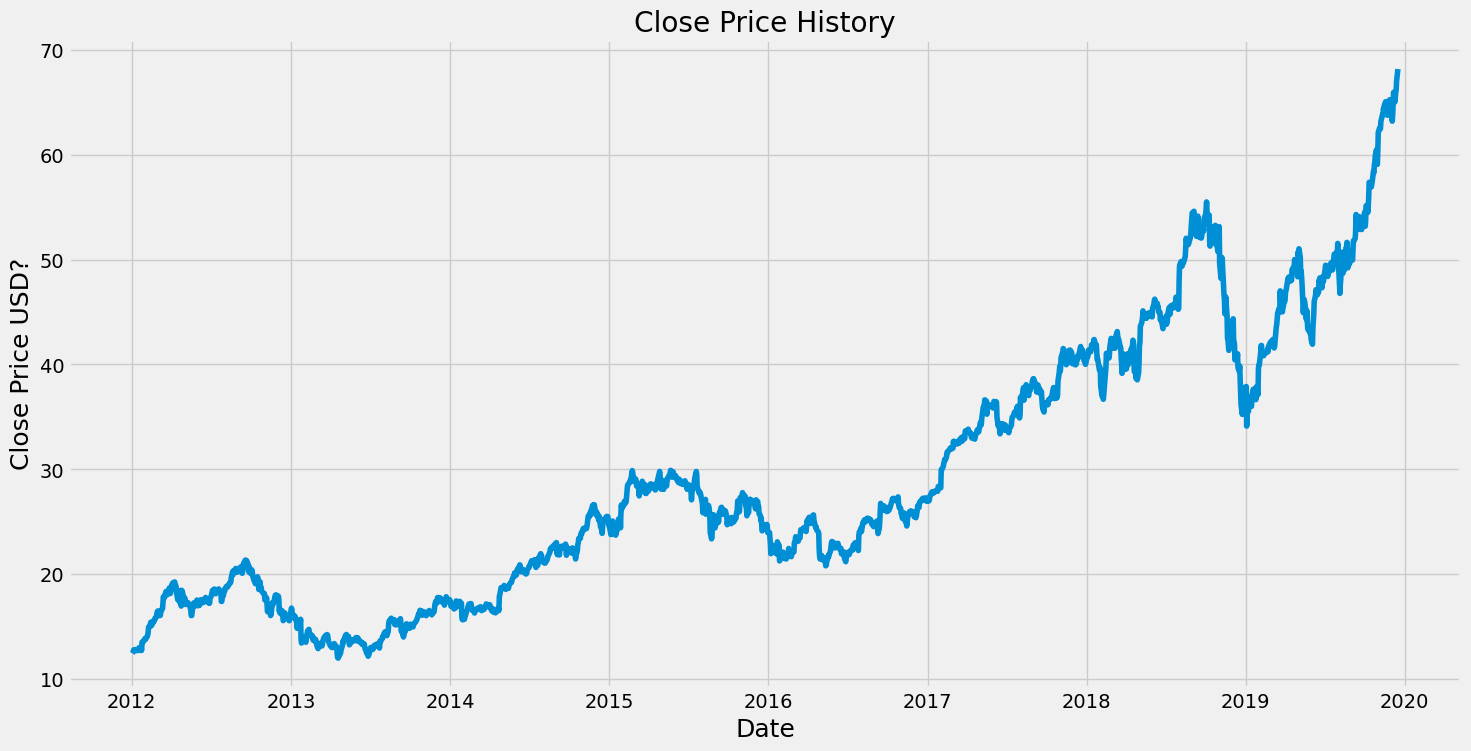

In [26]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD?', fontsize=18)
plt.show()

In [27]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

1602

In [28]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00805072],
       [0.00924202],
       [0.01171614],
       ...,
       [0.96357318],
       [0.97957512],
       [1.        ]])

In [30]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00805072, 0.00924202, 0.01171614, 0.01407169, 0.0137105 ,
       0.01452442, 0.01415249, 0.01352727, 0.01267561, 0.01531139,
       0.01768857, 0.01695546, 0.0129397 , 0.01677218, 0.01299896,
       0.0271485 , 0.02605429, 0.02748263, 0.0305713 , 0.03244172,
       0.03228542, 0.03170864, 0.03416659, 0.03647905, 0.03909879,
       0.04333013, 0.05221866, 0.05235341, 0.05730177, 0.06099947,
       0.05464422, 0.05709139, 0.05704299, 0.06390479, 0.06292917,
       0.06473481, 0.06797978, 0.0697855 , 0.074987  , 0.07877652,
       0.07987068, 0.08025344, 0.07377436, 0.07221125, 0.07244296,
       0.07853405, 0.08024811, 0.08392964, 0.09260801, 0.10418629,
       0.10201944, 0.1020247 , 0.11039566, 0.11301564, 0.11115049,
       0.1094473 , 0.10767391, 0.11356548, 0.11760808, 0.11930054])]
[0.11511772663301414]

[array([0.00805072, 0.00924202, 0.01171614, 0.01407169, 0.0137105 ,
       0.01452442, 0.01415249, 0.01352727, 0.01267561, 0.01531139,
       0.01768857, 0.01695546, 0.01

In [31]:
# Now you can see that it uses 59 days to predict the 60st day closing price. y_train gives the y-values which are the predictions
# from the code you can see that it predicts now for day 60 (using days 1-59) and day 61 (using days 2-60)

In [32]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
#Reshape the data (LSTM expects the input to be 3-dimensional, it is currenlty 2-dimensional)
x_train.shape

(1542, 60)

In [34]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [36]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 33s 17ms/step - loss: 9.5807e-04


In [39]:
# Create the testing data set
#Create a new array containing scaled values from index 1542 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [40]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [41]:
# Reshape the data (2-dimensional to a 3-dimensional)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [42]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 16ms/step


In [43]:
# Get the root mean squared error (RMSE) (measure on how accurate the model is) (Lower value = better fit) (Use more measures in the future)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse


1.3751390075683594

In [45]:
# A value of 0 for the MSE means that the predictions were exact

C:\Users\tuukk\AppData\Local\Temp\ipykernel_20188\1851714377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


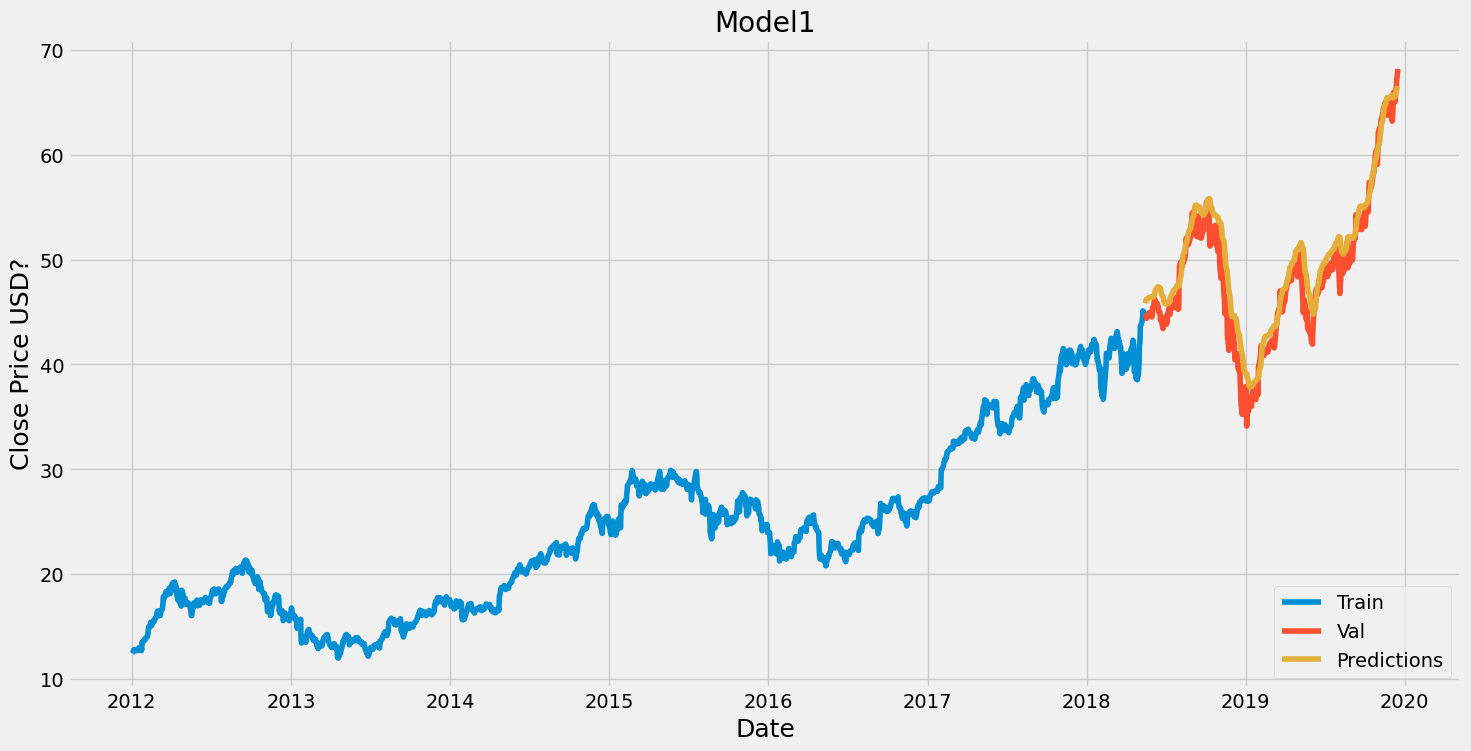

In [46]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model1')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD?', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [47]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16 00:00:00-04:00,44.840046,45.831684
2018-05-17 00:00:00-04:00,44.556492,46.058582
2018-05-18 00:00:00-04:00,44.394444,46.199467
2018-05-21 00:00:00-04:00,44.708984,46.264694
2018-05-22 00:00:00-04:00,44.596992,46.311836
...,...,...
2019-12-10 00:00:00-05:00,65.390457,65.656540
2019-12-11 00:00:00-05:00,65.948181,65.800026
2019-12-12 00:00:00-05:00,66.116249,65.994301


In [49]:
# get the quote
apple_quote = yf.Ticker("AAPL")
apple_quote = apple_quote.history(start="2012-01-01", end="2019-12-17")
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
X_test = []
# Append the past 60 days 
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 32ms/step
[[66.91507]]


In [53]:
apple_quote2 = yf.Ticker("AAPL")
apple_quote2 = apple_quote2.history(start="2019-12-15", end="2019-12-17")
print(apple_quote2['Close'])

Date
2019-12-16 00:00:00-05:00    68.16214
Name: Close, dtype: float64


In [ ]:
# Improvement ideas: 
#add the precision (how often did it predict the rigth up or down movement)
#also use variables such as high / low / volume
#technical analysis indicators
#sentiment analysis